Introduction: In our quest to find the best neighborhood in Pittsburgh, we have considered walkability as one of the key factors. To complement that, we have chosen to assess the safety of the neighborhoods as well. A neighborhood's safety plays a vital role in the overall living experience and peace of mind for its residents. For this metric, we will use crime data from the Pittsburgh Police Department to measure the number of reported crimes per capita (i.e., per 1,000 residents) in each neighborhood. Our aim is to provide a clear understanding of how safe each neighborhood is, with a lower crime rate per capita indicating a safer environment.

The Metric: We'll be using the "Pittsburgh Police Arrest Data" dataset to measure the safety of neighborhoods in Pittsburgh. This dataset contains information on various types of reported crimes, such as theft, burglary, assault, and drug-related offenses. To determine the safety of a neighborhood, we will calculate the number of reported crimes per capita. A lower crime rate per capita indicates a safer neighborhood.

The crime rate per capita in Squirrel Hill North is: 22.64500378819766
Squirrel Hill North's crime rate per capita is in the top 0.98% among all the neighborhoods.


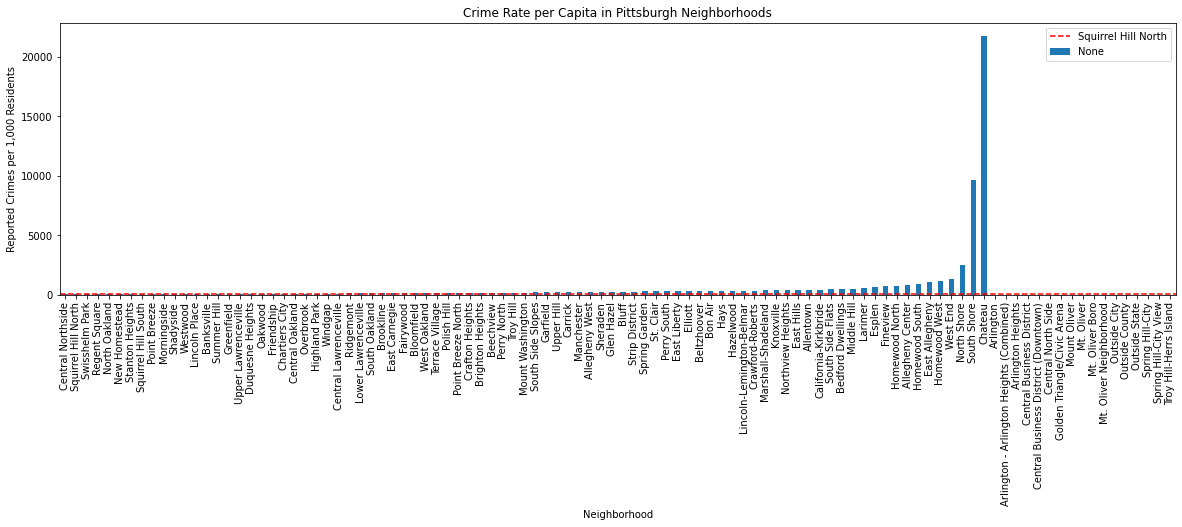

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

data_path = os.path.join(os.getcwd(), 'datasets', 'e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv')
crime_df = pd.read_csv(data_path)

# Calculate the number of reported crimes for each neighborhood
neighborhood_crime_count = crime_df['INCIDENTNEIGHBORHOOD'].value_counts()

# Get the population data for each neighborhood
population_data_path = os.path.join(os.getcwd(), 'datasets', 'preliminarycitypittsburghneighborhood_pl94171summary-2.csv')
population_df = pd.read_csv(population_data_path)
population_df.set_index('Neighborhood', inplace=True)

# Calculate the crime rate per capita for each neighborhood
crime_rate_per_capita = (neighborhood_crime_count / population_df['2020_Total_Population']) * 1000

# Get the crime rate per capita for Squirrel Hill North
squirrel_hill_north_crime_rate = crime_rate_per_capita.loc['Squirrel Hill North']

print("The crime rate per capita in Squirrel Hill North is:", squirrel_hill_north_crime_rate)

# Rank neighborhoods by their crime rate per capita
crime_rate_rank = crime_rate_per_capita.sort_values(ascending=True)

# Calculate the percentile of Squirrel Hill North in terms of crime rate
squirrel_hill_north_rank = crime_rate_rank.index.get_loc('Squirrel Hill North')
percentile = (squirrel_hill_north_rank / len(crime_rate_rank)) * 100

print("Squirrel Hill North's crime rate per capita is in the top %.2f%% among all the neighborhoods." % percentile)

# Visualize the crime rate per capita for all neighborhoods
crime_rate_rank.plot(kind="bar", figsize=(20, 5))
plt.title("Crime Rate per Capita in Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Reported Crimes per 1,000 Residents")
plt.axhline(y=squirrel_hill_north_crime_rate, color='r', linestyle='--', label="Squirrel Hill North")
plt.legend()
plt.show()
